In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/root/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 创建对象
1. 可以通过传递一个list对象来创建一个Series，pandas会默认创建整型索引

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [130]:
s.value_counts()

5.0    1
3.0    1
1.0    1
dtype: int64

`value_counts()`展示某个数值的具体数量，是`Series`对象的方法

完整函数
> value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
> 1. normalize : boolean, default False　默认false，如为true，则以百分比的形式显示
> 2. sort : boolean, default True　默认为true,会对结果进行排序
> 3. ascending : boolean, default False　默认降序排序
> 4. bins : integer, 格式(bins=1),意义不是执行计算，而是把它们分成半开放的数据集合，只适用于数字数据
> 5. dropna : boolean, default True　默认删除na值

2. 传递一个numpy array，时间索引以及列标签来创建一个DataFrame

In [7]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.339152,0.505883,-1.021527,-1.531232
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865
2013-01-04,1.520954,0.562117,0.371015,2.321350
2013-01-05,0.648447,0.430204,-0.307613,1.959410
2013-01-06,1.643486,1.131473,0.411023,0.948086


3. 通过一个能够被转换为类似Series的字典对象来创建DataFrame

In [17]:
df2 = pd.DataFrame({'A' : 1,
                    'B' : pd.Timestamp('20130102'),
                   'C' : pd.Series(1, index = list(range(4)), dtype = 'float32'),
                   'D' : np.array([3] * 4, dtype = 'int32'),
                   'E' : pd.Categorical(['test', 'train', 'test', 'train']),
                   'F' : 'foo'})
df2

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-02,1.0,3,test,foo
3,1,2013-01-02,1.0,3,train,foo


4. 查看不同列的数据类型

In [18]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

pandas中`Series`和`DataFrame`的区别：
- `Series`是一个一维数据结构，由index和value组成
- `DataFrame`是一个二维结构，除了index和value外还有column
- `DataFrame`由多个`Series`组成，无论是行还是列，单独拆分出来都是一个`Series`


## 查看数据
1. 查看frame中头部和尾部的行

In [19]:
df.head()

,A,B,C,D
2013-01-01,0.339152,0.505883,-1.021527,-1.531232
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865
2013-01-04,1.520954,0.562117,0.371015,2.321350
2013-01-05,0.648447,0.430204,-0.307613,1.959410


In [21]:
df.tail(2)

,A,B,C,D
2013-01-05,0.648447,0.430204,-0.307613,1.959410
2013-01-06,1.643486,1.131473,0.411023,0.948086


2. 显示索引，列和底层的numpy数据

In [26]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [27]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [28]:
df.values

array([[ 0.33915169,  0.50588297, -1.02152745, -1.53123213],
       [-0.82379225, -0.46167824,  0.29401649, -0.70532507],
       [ 0.61745653, -0.59246373, -0.68578518, -0.40486458],
       [ 1.52095415,  0.56211723,  0.37101501,  2.32135049],
       [ 0.6484469 ,  0.43020354, -0.30761303,  1.95941008],
       [ 1.64348559,  1.13147305,  0.41102268,  0.94808553]])

3. describe()函数对数据进行快速分析汇总

In [29]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.657617,0.262589,-0.156479,0.431237
std,0.896100,0.661459,0.609027,1.550297
min,-0.823792,-0.592464,-1.021527,-1.531232
25%,0.408728,-0.238708,-0.591242,-0.630210
50%,0.632952,0.468043,-0.006798,0.271610
75%,1.302827,0.548059,0.351765,1.706579
max,1.643486,1.131473,0.411023,2.321350


4. 对数据进行转置

In [30]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.339152,-0.823792,0.617457,1.520954,0.648447,1.643486
B,0.505883,-0.461678,-0.592464,0.562117,0.430204,1.131473
C,-1.021527,0.294016,-0.685785,0.371015,-0.307613,0.411023
D,-1.531232,-0.705325,-0.404865,2.321350,1.959410,0.948086


5. 按轴进行排序

In [33]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.531232,-1.021527,0.505883,0.339152
2013-01-02,-0.705325,0.294016,-0.461678,-0.823792
2013-01-03,-0.404865,-0.685785,-0.592464,0.617457
2013-01-04,2.321350,0.371015,0.562117,1.520954
2013-01-05,1.959410,-0.307613,0.430204,0.648447
2013-01-06,0.948086,0.411023,1.131473,1.643486


6. 按值进行排序

In [38]:
df.sort_values(by = 'B', ascending=False)

,A,B,C,D
2013-01-06,1.643486,1.131473,0.411023,0.948086
2013-01-04,1.520954,0.562117,0.371015,2.321350
2013-01-01,0.339152,0.505883,-1.021527,-1.531232
2013-01-05,0.648447,0.430204,-0.307613,1.959410
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865


## 选择

1. 选择一个单独的列，这将会返回一个Series，等同于df.A

In [39]:
df['A']

2013-01-01    0.339152
2013-01-02   -0.823792
2013-01-03    0.617457
2013-01-04    1.520954
2013-01-05    0.648447
2013-01-06    1.643486
Freq: D, Name: A, dtype: float64

In [40]:
df.A

2013-01-01    0.339152
2013-01-02   -0.823792
2013-01-03    0.617457
2013-01-04    1.520954
2013-01-05    0.648447
2013-01-06    1.643486
Freq: D, Name: A, dtype: float64

2. 切片选择

In [41]:
df[:3]

,A,B,C,D
2013-01-01,0.339152,0.505883,-1.021527,-1.531232
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865


In [42]:
df['A'][0:3]

2013-01-01    0.339152
2013-01-02   -0.823792
2013-01-03    0.617457
Freq: D, Name: A, dtype: float64

### 按标签取值

1. 通过标签选择一个交叉的区域

In [44]:
print(dates[0])
df.loc[dates[0]]

2013-01-01 00:00:00


A    0.339152
B    0.505883
C   -1.021527
D   -1.531232
Name: 2013-01-01 00:00:00, dtype: float64

2. 通过标签在多个值上进行选择

In [45]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,0.339152,0.505883
2013-01-02,-0.823792,-0.461678
2013-01-03,0.617457,-0.592464
2013-01-04,1.520954,0.562117
2013-01-05,0.648447,0.430204
2013-01-06,1.643486,1.131473


3. 标签切片

In [46]:
df.loc['20130102':'20130104', 'A':'C']

,A,B,C
2013-01-02,-0.823792,-0.461678,0.294016
2013-01-03,0.617457,-0.592464,-0.685785
2013-01-04,1.520954,0.562117,0.371015


4. 获取一个标量

In [47]:
df.loc[dates[0], 'A']

0.33915169106046167

5. 快速访问一个标量，和上一个方法等价

In [48]:
df.at[dates[0], 'A']

0.33915169106046167

> `loc`就是`Selection by label`函数，也就是按照标签取数据，标签就是上面的时间和A-D（就是行名称和列名称）。可以传入两个参数，第一个参数选择index（行名称），第二个参数选择column（列名称）

### 通过位置进行选择

1. 通过传递数值进行位置选择（选择行）

In [49]:
df.iloc[3]

A    1.520954
B    0.562117
C    0.371015
D    2.321350
Name: 2013-01-04 00:00:00, dtype: float64

2. 通过数值进行切片

In [50]:
df.iloc[:3,:2]

,A,B
2013-01-01,0.339152,0.505883
2013-01-02,-0.823792,-0.461678
2013-01-03,0.617457,-0.592464


3. 通过指定一个位置的列表

In [52]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.823792,0.294016
2013-01-03,0.617457,-0.685785
2013-01-05,0.648447,-0.307613


4. 对行进行切片

In [53]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865


5. 对列进行切片

In [55]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.505883,-1.021527
2013-01-02,-0.461678,0.294016
2013-01-03,-0.592464,-0.685785
2013-01-04,0.562117,0.371015
2013-01-05,0.430204,-0.307613
2013-01-06,1.131473,0.411023


6. 获取特定的值

In [56]:
df.iloc[1, 1]

-0.4616782370645855

> `iloc`函数为`Selection by Position`，也就是按照位置选择数据，也就是第m行，第n列数据，传入的参数应该是行列索引或者切片

### 布尔索引

1. 使用一个单独列的值选择数据

In [57]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.339152,0.505883,-1.021527,-1.531232
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865
2013-01-04,1.520954,0.562117,0.371015,2.321350
2013-01-05,0.648447,0.430204,-0.307613,1.959410
2013-01-06,1.643486,1.131473,0.411023,0.948086


2. 使用where操作来选择数据

In [58]:
df[df > 0]

,A,B,C,D
2013-01-01,0.339152,0.505883,NaN,NaN
2013-01-02,NaN,NaN,0.294016,NaN
2013-01-03,0.617457,NaN,NaN,NaN
2013-01-04,1.520954,0.562117,0.371015,2.321350
2013-01-05,0.648447,0.430204,NaN,1.959410
2013-01-06,1.643486,1.131473,0.411023,0.948086


3. 使用isin()方法过滤

In [69]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.339152,0.505883,-1.021527,-1.531232,one
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325,one
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865,two
2013-01-04,1.520954,0.562117,0.371015,2.321350,three
2013-01-05,0.648447,0.430204,-0.307613,1.959410,four
2013-01-06,1.643486,1.131473,0.411023,0.948086,three


In [70]:
print(df2['E'].isin(['two', 'four']))
df2[df2['E'].isin(['two', 'four'])]

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool


,A,B,C,D,E
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865,two
2013-01-05,0.648447,0.430204,-0.307613,1.959410,four


In [71]:
df2[[True, False, False, False, False, True]]

,A,B,C,D,E
2013-01-01,0.339152,0.505883,-1.021527,-1.531232,one
2013-01-06,1.643486,1.131473,0.411023,0.948086,three


### 设置
1. 设置一个新的列

In [77]:
s1 = pd.Series([1, 2, 3, 4, 5, 6])
s1

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [78]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.339152,0.505883,-1.021527,-1.531232,NaN
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325,NaN
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865,NaN
2013-01-04,1.520954,0.562117,0.371015,2.321350,NaN
2013-01-05,0.648447,0.430204,-0.307613,1.959410,NaN
2013-01-06,1.643486,1.131473,0.411023,0.948086,NaN


In [79]:
df['F'] = [1, 2, 3, 4, 5, 6]
df

,A,B,C,D,F
2013-01-01,0.339152,0.505883,-1.021527,-1.531232,1
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325,2
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865,3
2013-01-04,1.520954,0.562117,0.371015,2.321350,4
2013-01-05,0.648447,0.430204,-0.307613,1.959410,5
2013-01-06,1.643486,1.131473,0.411023,0.948086,6


In [81]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods = 6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.339152,0.505883,-1.021527,-1.531232,NaN
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325,1.0
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865,2.0
2013-01-04,1.520954,0.562117,0.371015,2.321350,3.0
2013-01-05,0.648447,0.430204,-0.307613,1.959410,4.0
2013-01-06,1.643486,1.131473,0.411023,0.948086,5.0


2. 通过标签设置新的值

In [85]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.021527,-1.531232,NaN
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325,1.0
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865,2.0
2013-01-04,1.520954,0.562117,0.371015,2.321350,3.0
2013-01-05,0.648447,0.430204,-0.307613,1.959410,4.0
2013-01-06,1.643486,1.131473,0.411023,0.948086,5.0


3. 通过位置设置新的值

In [87]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.021527,-1.531232,NaN
2013-01-02,-0.823792,-0.461678,0.294016,-0.705325,1.0
2013-01-03,0.617457,-0.592464,-0.685785,-0.404865,2.0
2013-01-04,1.520954,0.562117,0.371015,2.321350,3.0
2013-01-05,0.648447,0.430204,-0.307613,1.959410,4.0
2013-01-06,1.643486,1.131473,0.411023,0.948086,5.0


4. 通过numpy数组设置一组新值

In [88]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.021527,5,NaN
2013-01-02,-0.823792,-0.461678,0.294016,5,1.0
2013-01-03,0.617457,-0.592464,-0.685785,5,2.0
2013-01-04,1.520954,0.562117,0.371015,5,3.0
2013-01-05,0.648447,0.430204,-0.307613,5,4.0
2013-01-06,1.643486,1.131473,0.411023,5,5.0


5. 通过where操作来设置新的值

In [89]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.021527,-5,NaN
2013-01-02,-0.823792,-0.461678,-0.294016,-5,-1.0
2013-01-03,-0.617457,-0.592464,-0.685785,-5,-2.0
2013-01-04,-1.520954,-0.562117,-0.371015,-5,-3.0
2013-01-05,-0.648447,-0.430204,-0.307613,-5,-4.0
2013-01-06,-1.643486,-1.131473,-0.411023,-5,-5.0


## 缺失值处理
在pandas中，使用np.nan来代替缺失值，这些值将默认不会包含在计算中

1. `reindex`方法可以对指定轴上的索引进行改变/增加/删除操作，这将返回原始数据的一个拷贝

In [91]:
df1 = df.reindex(index=dates[:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.021527,5,NaN,NaN
2013-01-02,-0.823792,-0.461678,0.294016,5,1.0,NaN
2013-01-03,0.617457,-0.592464,-0.685785,5,2.0,NaN
2013-01-04,1.520954,0.562117,0.371015,5,3.0,NaN


In [92]:
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.021527,5,NaN,1.0
2013-01-02,-0.823792,-0.461678,0.294016,5,1.0,1.0
2013-01-03,0.617457,-0.592464,-0.685785,5,2.0,NaN
2013-01-04,1.520954,0.562117,0.371015,5,3.0,NaN


2. 去掉包含缺失值的行，返回新的不包含缺失值的数据，原数据不变

In [96]:
df2 = df1.dropna(how = 'any')
df2

,A,B,C,D,F,E
2013-01-02,-0.823792,-0.461678,0.294016,5,1.0,1.0


3. 对缺失值进行填充

In [98]:
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.021527,5,5.0,1.0
2013-01-02,-0.823792,-0.461678,0.294016,5,1.0,1.0
2013-01-03,0.617457,-0.592464,-0.685785,5,2.0,5.0
2013-01-04,1.520954,0.562117,0.371015,5,3.0,5.0


4. 对数据进行布尔填充

In [100]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [103]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


`isnull()`方法返回布尔值，该处为缺失值，则返回True，否则返回False，还可以继续调用

In [104]:
df1.isnull().any()

A    False
B    False
C    False
D    False
F     True
E     True
dtype: bool

`df1.isnull().any()`会判断哪些列包含缺失值，该列存在缺失值则返回True，否则返回False

In [108]:
df1.isnull().any()[0]

False

In [110]:
df1.isnull().sum()

A    0
B    0
C    0
D    0
F    1
E    2
dtype: int64

`df1.isnull().sum()`返回每列缺失值的数量

## 相关操作

### 统计

1. 执行描述性统计，默认都是对列进行操作

In [116]:
df.mean()

A    0.601092
B    0.178275
C   -0.156479
D    5.000000
F    3.000000
dtype: float64

In [117]:
df.mean(1)

2013-01-01    0.994618
2013-01-02    1.001709
2013-01-03    1.267842
2013-01-04    2.090817
2013-01-05    1.954207
2013-01-06    2.637196
Freq: D, dtype: float64

In [118]:
df.sum()

A     3.606551
B     1.069652
C    -0.938871
D    30.000000
F    15.000000
dtype: float64

In [119]:
df.max()

A    1.643486
B    1.131473
C    0.411023
D    5.000000
F    5.000000
dtype: float64

In [120]:
df.std()

A    0.930252
B    0.656468
C    0.609027
D    0.000000
F    1.581139
dtype: float64

2. 对于拥有不同维度，需要对其的对象进行操作，pandas会自动沿着指定的维度进行广播

In [121]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

`shift()`可以把数据移动指定的位数，默认为列方向上。上面的例子中就是向下移动两位

`shift(periods = 2, axis = 1)`：向右移动两位，`periods`可以是负值，表示向上或者向左移动

In [125]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.382543,-1.592464,-1.685785,4.0,1.0
2013-01-04,-1.479046,-2.437883,-2.628985,2.0,0.0
2013-01-05,-4.351553,-4.569796,-5.307613,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


3. 对数据应用函数

In [127]:
df.apply(lambda x: x.max() - x.min())

A    2.467278
B    1.723937
C    1.432550
D    0.000000
F    4.000000
dtype: float64

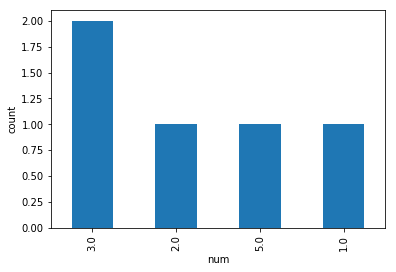

In [143]:
s = pd.Series([1, 3, 5, np.nan, 2, 3])
pic = s.value_counts().plot(kind = 'bar')
pic.set_xlabel('num')
pic.set_ylabel('count')
plt.show()

## 合并

Pandas提供了大量方法实现对Series，DataFrame对象进行各种符合逻辑关系的合并操作

1. Concat

In [145]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.150110,0.326179,-0.075044,-1.006339
1,0.399043,1.376000,0.209489,2.555978
2,-0.099657,-1.806494,-0.100778,-0.334348
3,-1.047211,0.618534,0.372164,-0.347251
4,0.512242,-0.245783,-0.851211,1.906837
5,0.113236,1.518368,0.599375,0.296711
6,0.747426,-0.413194,0.601364,0.446259
7,0.069418,-1.041317,1.695985,1.586496
8,2.120622,0.388041,-3.445950,-0.126315
9,0.978735,-0.466134,-1.891796,1.507205


In [146]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.150110  0.326179 -0.075044 -1.006339
 1  0.399043  1.376000  0.209489  2.555978
 2 -0.099657 -1.806494 -0.100778 -0.334348,
           0         1         2         3
 3 -1.047211  0.618534  0.372164 -0.347251
 4  0.512242 -0.245783 -0.851211  1.906837
 5  0.113236  1.518368  0.599375  0.296711
 6  0.747426 -0.413194  0.601364  0.446259,
           0         1         2         3
 7  0.069418 -1.041317  1.695985  1.586496
 8  2.120622  0.388041 -3.445950 -0.126315
 9  0.978735 -0.466134 -1.891796  1.507205]

In [148]:
pd.concat(pieces)

,0,1,2,3
0,0.150110,0.326179,-0.075044,-1.006339
1,0.399043,1.376000,0.209489,2.555978
2,-0.099657,-1.806494,-0.100778,-0.334348
3,-1.047211,0.618534,0.372164,-0.347251
4,0.512242,-0.245783,-0.851211,1.906837
5,0.113236,1.518368,0.599375,0.296711
6,0.747426,-0.413194,0.601364,0.446259
7,0.069418,-1.041317,1.695985,1.586496
8,2.120622,0.388041,-3.445950,-0.126315
9,0.978735,-0.466134,-1.891796,1.507205


2. append()将一行连接在一个DataFrame上

In [149]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.595932,-0.765495,0.330562,-0.329917
1,0.195612,0.066617,0.875303,-1.551710
2,-0.440780,0.143404,0.237359,-0.114848
3,2.259004,0.254024,1.722789,0.918415
4,-1.484105,-0.687459,-0.557989,0.436225
5,1.092412,0.586298,0.820977,0.639585
6,-0.538411,-0.616375,2.457215,-0.277120
7,-0.148492,0.912587,0.637519,-1.001490


In [150]:
s = df.iloc[3]

In [152]:
df.append(s)

,A,B,C,D
0,0.595932,-0.765495,0.330562,-0.329917
1,0.195612,0.066617,0.875303,-1.551710
2,-0.440780,0.143404,0.237359,-0.114848
3,2.259004,0.254024,1.722789,0.918415
4,-1.484105,-0.687459,-0.557989,0.436225
5,1.092412,0.586298,0.820977,0.639585
6,-0.538411,-0.616375,2.457215,-0.277120
7,-0.148492,0.912587,0.637519,-1.001490
3,2.259004,0.254024,1.722789,0.918415


In [153]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.595932,-0.765495,0.330562,-0.329917
1,0.195612,0.066617,0.875303,-1.551710
2,-0.440780,0.143404,0.237359,-0.114848
3,2.259004,0.254024,1.722789,0.918415
4,-1.484105,-0.687459,-0.557989,0.436225
5,1.092412,0.586298,0.820977,0.639585
6,-0.538411,-0.616375,2.457215,-0.277120
7,-0.148492,0.912587,0.637519,-1.001490
8,2.259004,0.254024,1.722789,0.918415


## 导入和保存数据

1. 写入csv文件

In [154]:
df.to_csv('foo.csv')

2. 从csv文件中读取

In [155]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,0,0.595932,-0.765495,0.330562,-0.329917
1,1,0.195612,0.066617,0.875303,-1.551710
2,2,-0.440780,0.143404,0.237359,-0.114848
3,3,2.259004,0.254024,1.722789,0.918415
4,4,-1.484105,-0.687459,-0.557989,0.436225
5,5,1.092412,0.586298,0.820977,0.639585
6,6,-0.538411,-0.616375,2.457215,-0.277120
7,7,-0.148492,0.912587,0.637519,-1.001490


3. 写入hdf5和读取

In [156]:
df.to_hdf('foo.h5', 'df')

/root/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [157]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
0,0.595932,-0.765495,0.330562,-0.329917
1,0.195612,0.066617,0.875303,-1.551710
2,-0.440780,0.143404,0.237359,-0.114848
3,2.259004,0.254024,1.722789,0.918415
4,-1.484105,-0.687459,-0.557989,0.436225
5,1.092412,0.586298,0.820977,0.639585
6,-0.538411,-0.616375,2.457215,-0.277120
7,-0.148492,0.912587,0.637519,-1.001490


4. 写入和读取excel

In [158]:
df.to_excel('foo.xlsx', sheet_name = 'sheet1')
pd.read_excel('foo.xlsx', 'sheet1')

,Unnamed: 0,A,B,C,D
0,0,0.595932,-0.765495,0.330562,-0.329917
1,1,0.195612,0.066617,0.875303,-1.551710
2,2,-0.440780,0.143404,0.237359,-0.114848
3,3,2.259004,0.254024,1.722789,0.918415
4,4,-1.484105,-0.687459,-0.557989,0.436225
5,5,1.092412,0.586298,0.820977,0.639585
6,6,-0.538411,-0.616375,2.457215,-0.277120
7,7,-0.148492,0.912587,0.637519,-1.001490
